In [81]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

In [82]:
# upload data
df = pd.read_csv("balanced_dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
1,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
2,0,31.64,1,0,0,5,0,1,0,80,0,2,0,2,9,1,0,0
3,0,28.37,1,0,0,0,0,1,1,77,0,2,1,3,8,0,0,0
4,0,28.15,0,0,0,7,0,1,0,80,0,0,0,2,7,0,0,0


In [83]:
# printing out the column names for easier copying for X/y
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [84]:
#  X/y -variables

# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
X = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']]

# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
y = df['HeartDisease']

In [85]:
#  Train/test/validation -split

# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [86]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 139688
Test data amount: 29934
Validation data amount: 29933


In [87]:
# save the categories into a list
categories = list(np.unique(df['HeartDisease']))
print(categories)

[0, 1]


In [ ]:
# I did not Encode values for the Heart Disease
# that is why I used loss="binary_crossentropy"
# and also because of this I needed to use activation="sigmoid"

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")  # For binary classification
    ]
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
#  Train the neural network with our data

 # using validation again for better metrics and optimization
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_val, y_val))

Epoch 1/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9074 - loss: 1.0637 - val_accuracy: 0.9257 - val_loss: 0.2560
Epoch 2/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 4s 923us/step - accuracy: 0.9251 - loss: 0.2475 - val_accuracy: 0.9257 - val_loss: 0.2341
Epoch 3/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 4s 962us/step - accuracy: 0.9261 - loss: 0.2304 - val_accuracy: 0.9257 - val_loss: 0.2252
Epoch 4/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 4s 952us/step - accuracy: 0.9268 - loss: 0.2283 - val_accuracy: 0.9257 - val_loss: 0.2249
Epoch 5/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9263 - loss: 0.2267 - val_accuracy: 0.9257 - val_loss: 0.2255
Epoch 6/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9258 - loss: 0.2285 - val_accuracy: 0.9257 - val_loss: 0.2243
Epoch 7/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9269 - loss: 0.2250 - val_accuracy: 0.9257 - val_loss: 0.2248
Epoch 8/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9264 - l

<Axes: >

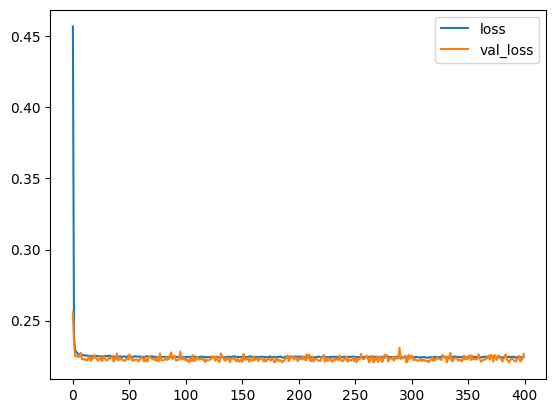

In [90]:
#  Training metrics
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

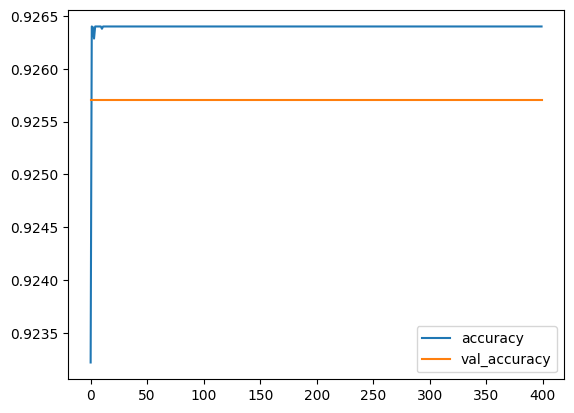

In [91]:
loss_df[['accuracy', 'val_accuracy']].plot()

# KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [ ]:
# compare test error values to training error values
# the model is often good when these error values are similar
# even if you training metrics above didn't overlap
# you might still get very close values in evaluation => more important

# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

# The train loss (0.0589) and test loss (0.0595) are very close
# this is a good sign :)

Test data evaluation:
[0.22730763256549835, 0.9258034229278564]

Train data evaluation:
[0.22477678954601288, 0.9264002442359924]


In [96]:
 # get predictions and convert with argmax() to get categories 
# instead of raw probabilities
#test_predictions = model.predict(X_test)
#test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
#y_test = np.argmax(y_test, axis=1)

# Get the model predictions (probabilities)
test_predictions = model.predict(X_test)

# Convert probabilities to class predictions (0 or 1)
test_predictions = (test_predictions > 0.5).astype(int)


936/936 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

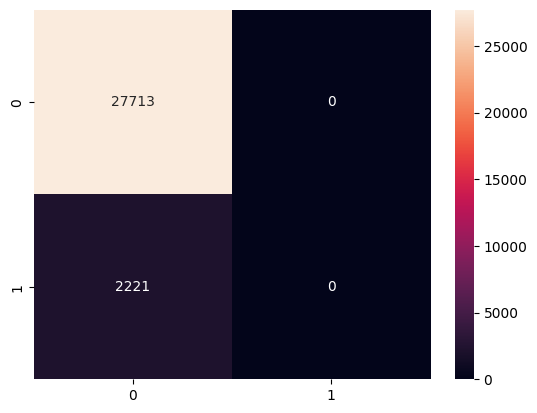

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

# for some reasons, there is 0 in True Positive

In [102]:
 # print the classification report based on true values and predictions

from sklearn.metrics import classification_report, accuracy_score

# Define categories as human-readable class labels
categories = ["No Disease", "Disease"]

# Generate the classification report
print(classification_report(y_test, test_predictions, target_names=categories))

# Calculate and print overall accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


              precision    recall  f1-score   support

  No Disease       0.93      1.00      0.96     27713
     Disease       0.00      0.00      0.00      2221

    accuracy                           0.93     29934
   macro avg       0.46      0.50      0.48     29934
weighted avg       0.86      0.93      0.89     29934

Accuracy: 92.58%


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classific

In [105]:
# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

from sklearn.metrics import roc_auc_score

# Get predicted probabilities
y_pred_prob = model.predict(X)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


6237/6237 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
ROC-AUC Score: 0.82
